In [118]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, fftshift, fftfreq    # FFT and helper functions
import numpy as np


from scipy.signal import hilbert, resample_poly
import librosa

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"

In [ ]:



sr, samp = wavfile.read(input_file)
data_off = resample_poly(samp,1,16)
Fs = int(2e3)
dc_off = np.mean(data_off)
data = data_off - dc_off


#frequencies, times, spectrogram = signal.spectrogram(samp, Fs)
analytic_signal = hilbert(data)
hilb_x = np.abs(analytic_signal)

t1 = np.linspace(0,(len(data_off)/Fs),len(data_off))




plt.figure(figsize=([16, 4]))	 # Define figure for plots
plt.plot(t1[Fs*300:int(Fs*300.1)], data[Fs*300:int(Fs*300.1)], label="Data")
plt.plot(t1[Fs*300:int(Fs*300.1)], hilb_x[Fs*300:int(Fs*300.1)], label="Hilbert")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

# Load the audio file

sr, data = wavfile.read(input_file)

# Convert stereo to mono if needed
if len(data.shape) > 1:
    data = np.mean(data, axis=1)  # Average the two channels

# Compute the FFT
N = len(data)  # Total number of samples
fft_result = fft(data)  # Apply Fourier Transform
frequencies = fftfreq(N, 1/sr)  # Get frequency values

# Get the magnitude spectrum
magnitude = np.abs(fft_result)[:N // 2]  # Take only positive frequencies
freqs = frequencies[:N // 2]  # Positive frequency range

# Count the number of significant Fourier components
threshold = np.max(magnitude) * 0.001  # Set a threshold (1% of max amplitude)
num_components = np.sum(magnitude > threshold)

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(freqs[1:], magnitude[1:], label="Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title(f"Frequency Spectrum - {num_components} Fourier Components Found")
plt.legend()
plt.show()

print(f"Number of significant Fourier components: {num_components}")


BroadBand Hilbert transform

Hilbert -> kvadrert -> midling filter -> nedsampling -> spectrogram

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, fftshift, fftfreq    # FFT and helper functions
import numpy as np



from scipy.signal import hilbert, resample_poly
import librosa

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"

#Getting data from wav file
data_org, sr = librosa.load(input_file)

#downsampling audio data
Fs = 2000 #[Hz]
data_offcet = resample_poly(data_org,1,int(sr/Fs))


#Removing Dc-offcet from data
dc_offcet = np.mean(data_offcet)
data = data_offcet - dc_offcet

t = np.linspace(0,(len(data_offcet)/Fs),len(data_offcet))

#Hilbert transform ov data
analytic_signal = np.absolute(hilbert(data))
#Squaring each element
h_2 = np.square(analytic_signal)

#Moving avg filter
med_filt_size = 11
h_filt = signal.medfilt(h_2,med_filt_size)

#Downsampling
DS_h = resample_poly(h_filt,1,med_filt_size)
DS_Fs = Fs/med_filt_size
DS_t = np.linspace(0,(len(DS_h)/DS_Fs),len(DS_h))

#Normalizing Hilbert
Norm_h = h_2/h_filt



#plotting results
plt.figure(figsize=(12,8))

plt.subplot(4,2,1)
plt.plot(t,data_offcet)
plt.title("Original signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,2)
plt.plot(t,data)
plt.title("Removing DC-offcet")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,3)
plt.plot(t,analytic_signal)
plt.title("Hilbert transform of signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,4)
plt.plot(t,h_2)
plt.title("Squared Hilbert transform")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,5)
plt.plot(t,h_filt)
plt.title("Med_filt result")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,6)
plt.plot(DS_t,DS_h)
plt.title("Downsampled med_filt result")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,7)
plt.plot(t[1:],Norm_h[1:])
plt.title("Hilbert Squared Norm")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,8)
plt.plot(DS_t,DS_h)
plt.title("Downsampled med_filt result")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")


plt.tight_layout()
plt.show()

In [122]:
#Hilbert spectrogram
def plot_spectrogram(x, t, fs, n_segment, f_max, s_min):
    """Plot spectrogram of signal x.

    Parameters
    ----------
    x: array of floats
        Signal in time-domain
    t: Numpy array of floats
        Time vector for x
    fs: float
        Sample rate [Samples/s]
    n_segmend: int
        No. of samples in segment for spectrogram calculation
    f_max: float
        Max. on frequency axis
    """
    # Configure spectrogram
    #s_min = -50       # Minimum on the intensity plot. Lower values are 'black'
		
    # Calculate spectrogram
    f, t, sx = signal.spectrogram(x, fs, nperseg=n_segment, detrend=False)
    sx_db = 10*np.log10(sx/sx.max())   # Convert to dB
    		
    # Plot spectrogram
    plt.figure(figsize=(16, 6))  # Define figure for results	
    plt.subplot(1, 1, 1)
    
    plt.pcolormesh(t, f, sx_db, vmin=s_min, cmap='inferno')  # Draw spectrogram image
    print(f.max())		
    plt.xlabel("Time [s]")         # Axis labels and scales
    plt.ylabel("Frequency [Hz]")
    plt.ylim(0, f_max)
    		
    plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
    plt.show()
    return 0
nperseg = 1000





In [ ]:
Hilber_spec3 = plot_spectrogram(analytic_signal,t,Fs,nperseg, 1000,-50)
Hilber_spec4 = plot_spectrogram(analytic_signal,t,Fs,nperseg, 1000,-65)


org_pec = plot_spectrogram(data,t,Fs,nperseg,1000,-65)
DS_spec = plot_spectrogram(DS_h,DS_t,DS_Fs,600,100,-50)

In [ ]:
#Chad DEMON
import numpy as np
import scipy.signal as signal
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Simulated signal parameters
fs = 10000  # Sampling rate (Hz)
t = np.arange(0, 2, 1/fs)  # Time vector (2 seconds)
carrier_freq = 3000  # Carrier frequency (Hz)
modulation_freq = 50  # Modulation frequency (Hz)
modulation_index = 0.5  # Modulation depth

# Generate a modulated signal: (1 + modulation) * carrier
modulation = 1 + modulation_index * np.sin(2 * np.pi * modulation_freq * t)
signal_original = modulation * np.sin(2 * np.pi * carrier_freq * t)

# Add some noise to simulate real-world conditions
noise = np.random.normal(0, 0.3, signal_original.shape)
noisy_signal = signal_original + noise

# Apply a bandpass filter around the carrier frequency


def bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')  # Corrected here!
    return filtfilt(b, a, signal)


filtered_signal = bandpass_filter(noisy_signal, lowcut=2500, highcut=3500, fs=fs)

# Compute Hilbert Transform to get the analytic signal
analytic_signal = signal.hilbert(filtered_signal)
envelope = np.abs(analytic_signal)

# Compute spectrogram of the envelope to extract modulation frequency
frequencies, times, Sxx = signal.spectrogram(envelope, fs=fs, nperseg=512)

# Plot the results
plt.figure(figsize=(12, 8))

# Original Noisy Signal
plt.subplot(3, 1, 1)
plt.plot(t[:1000], noisy_signal[:1000], label="Noisy Signal")
plt.plot(t[:1000], filtered_signal[:1000], label="Filtered Signal", alpha=0.8)
plt.legend()
plt.title("Original and Filtered Signal (Zoomed In)")

# Envelope Extraction
plt.subplot(3, 1, 2)
plt.plot(t[:1000], envelope[:1000], color='r', label="Envelope")
plt.legend()
plt.title("Extracted Envelope (Hilbert Transform)")

# Spectrogram of the Envelope
plt.subplot(3, 1, 3)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.title("DEMON Spectrogram (Modulation Frequency)")
plt.colorbar(label="Power (dB)")

plt.tight_layout()
plt.show()


200.0


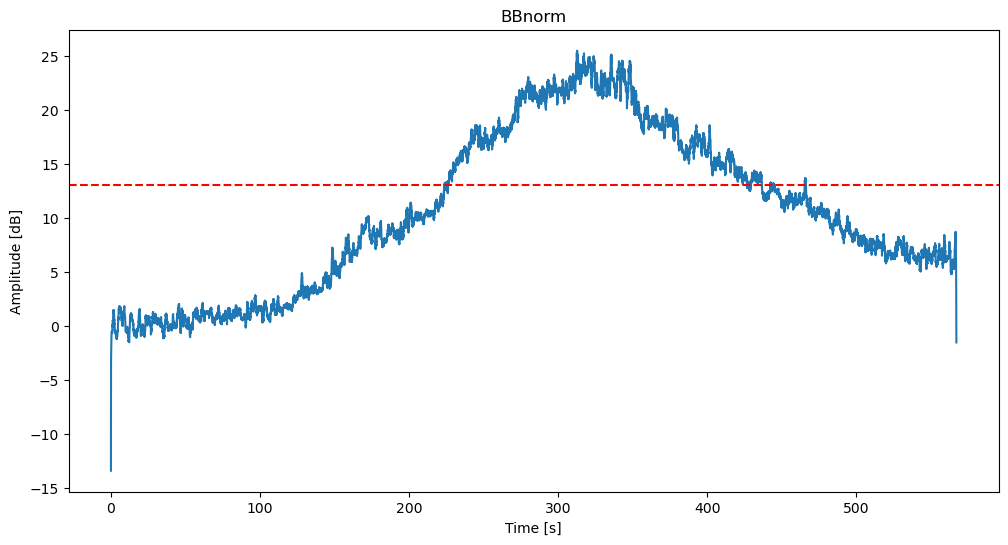

223.63
Due to filter_size mismatch, 0.0[s] is lost at end of file
Last used idx: 1700985 , 1701000
last possible idx to use: 1700999
[2.62263256e-05 5.28449254e-06 2.97476277e-06 ... 2.04473999e-05
 3.76628377e-05 2.89180152e-05]
200.0


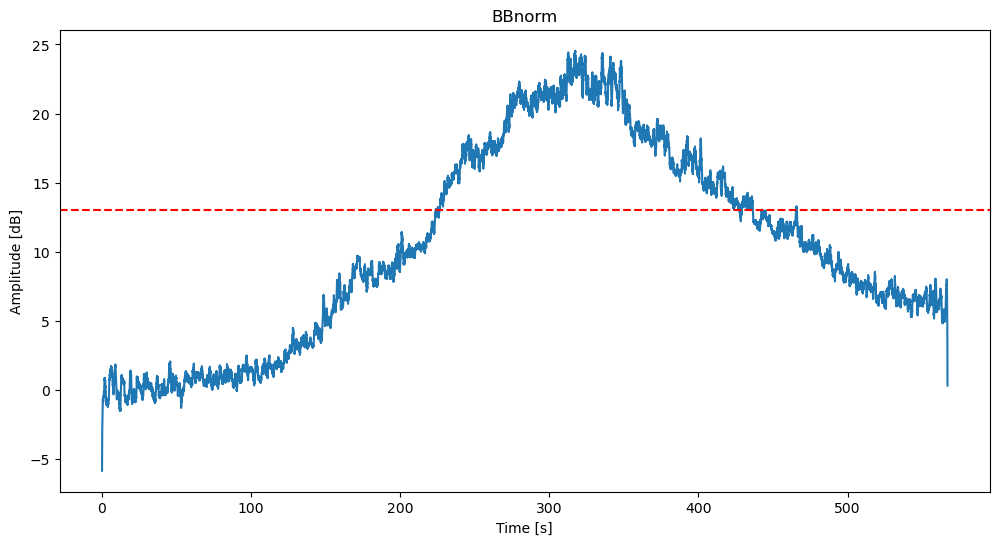

223.795


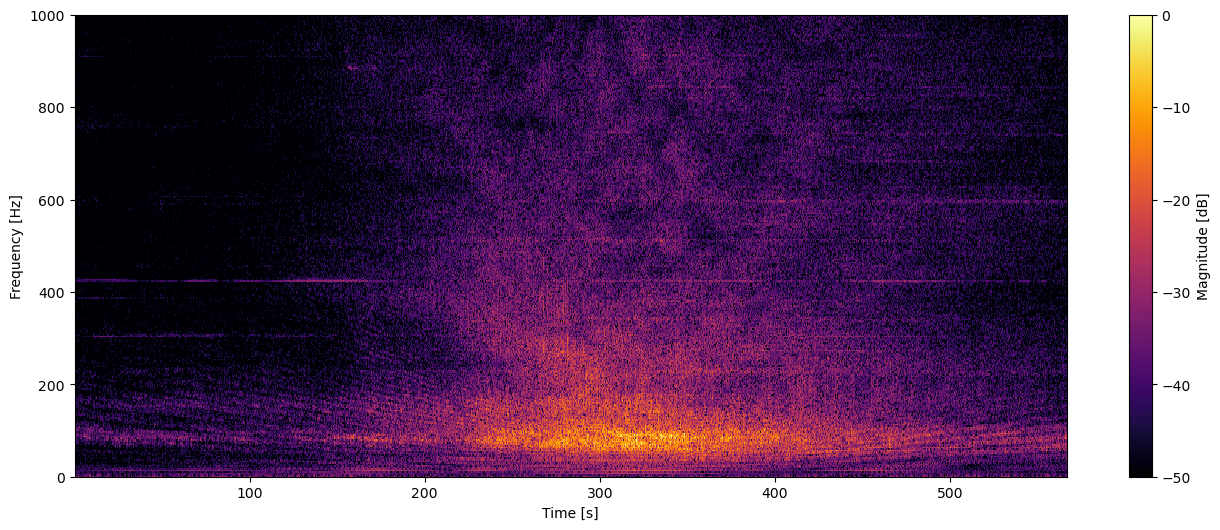

In [17]:
import functions
from scipy import signal
#Broad band and Demon testing
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"

DS_Sx, DS_Fs, DS_t = functions.Hilbert_DS(input_file,Fs=3000,medfilt_window=15,filter_type=1)
print(DS_Fs)
Trigger_time = functions.Hilbert_BB(DS_Sx,DS_Fs,window_size=1,noice_t_start=0,trigger=13,plot=True)
print(Trigger_time)


DS_Sx, DS_Fs, DS_t = functions.Hilbert_DS(input_file,Fs=3000,medfilt_window=15,filter_type=2)
print(DS_Fs)
Trigger_time = functions.Hilbert_BB(DS_Sx,DS_Fs,window_size=1,noice_t_start=0,trigger=13,plot=True)
print(Trigger_time)










spec = functions.plot_spectrogram_from_file(input_file,Fs=3000,n_segment=900,f_max=1e3,s_min=-50)



